In [1]:
import numpy as np
from numba import jit
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def expos(beta):
    ex = np.zeros(5,dtype=np.float32)
    ex[0]=np.exp(8.0*beta)
    ex[1]=np.exp(4.0*beta)
    ex[2]=1.0
    ex[3]=np.exp(-4.0*beta)
    ex[4]=np.exp(-8.0*beta)
    return ex

In [14]:
@jit(nopython=True)
def vizinhos(N):
    #Define a tabela de vizinhos
    L=int(np.sqrt(N))
    viz = np.zeros((N,4), dtype=np.int16)
    for k in range(N):
        viz[k,0]=k+1
        if (k+1) % L == 0: 
            viz[k,0] = k+1-L
            viz[k,1] = k+L
        if k > (N-L-1): 
            viz[k,1] = k+L-N
            viz[k,2] = k-1
        if (k % L == 0): 
            viz[k,2] = k+L-1
            viz[k,3] = k-L
        if k < L: 
            viz[k,3] = k+N-L
    return viz

In [25]:
def energia(s,viz):
    #Calcula a energia da configuração representada no array s
    N=len(s)
    ener = 0
    for i in range(N):
        h = s[viz[i,0]]+s[viz[i,1]] # soma do valor dos spins a direita e acima
        ener -= s[i]*h
    return ener

In [5]:
def calc_magnet(s):
    #Calcula a magnetizacao da configuração representada no array s
    N=len(s)
    mag = 0
    for i in range(N):
        mag += s[i]
    return mag

In [76]:
def monteCarlo(ss, temp, viz, energy, magnet):
    
    s = ss.copy()
    N = len(s)
    beta = 1 / temp
    exp = expos(beta)

    for _ in range(N):
        i = np.random.randint(0, N)

        h = s[viz[i,0]]+s[viz[i,1]]+s[viz[i,2]]+s[viz[i,3]] # soma dos vizinhos
        de = int(s[i]*h*0.5+2)
        p = exp[de]
        
        coin = np.random.random()

        if coin <= p:
            ss[i] *= -1
            energy += 2 * s[i]* h
            magnet += -2 * s[i]
            s[i] *= -1


    return energy, magnet

In [7]:
def create_net(size):
    vals = [-1, 1]
    net = np.random.choice(vals, size)
    return net

In [8]:
#Setting the random seed
seed = 42

In [72]:
#Simulating 5 different values of network size with temperature setted to 1
size = [24, 42, 64, 80, 100]
temperature = 1

#Number of monte carlo simulations
mc = 1000

np.random.seed(42)

#results dataframe
energy_df = pd.DataFrame(columns=size)
magnet_df = pd.DataFrame(columns=size)

for i in range(len(size)):
    local_size = size[i]
    
    #Create net and neighbors list
    net = create_net(local_size)
    viz = vizinhos(local_size)

    #Calculate energy and magnet
    energy = energia(net, viz)
    mmagnet = calc_magnet(net)

    #results arrays
    energy_array = np.zeros(mc)
    magnet_array = np.zeros(mc)

    #1000 Monte Carlo steps
    for j in range(mc):
        energy_array[j], magnet_array[j] = monteCarlo(net, temperature, viz, energy, mmagnet)

    energy_df[local_size] = energy_array
    magnet_df[local_size] = magnet_array    



Text(0, 0.5, 'Energia')

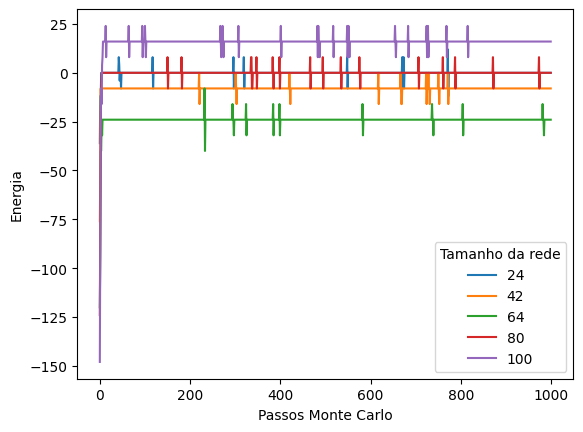

In [73]:
plt.plot(range(mc), energy_df)
plt.legend(title="Tamanho da rede", labels = size)
plt.xlabel("Passos Monte Carlo")
plt.ylabel("Energia")


Text(0, 0.5, 'Magnetizacao')

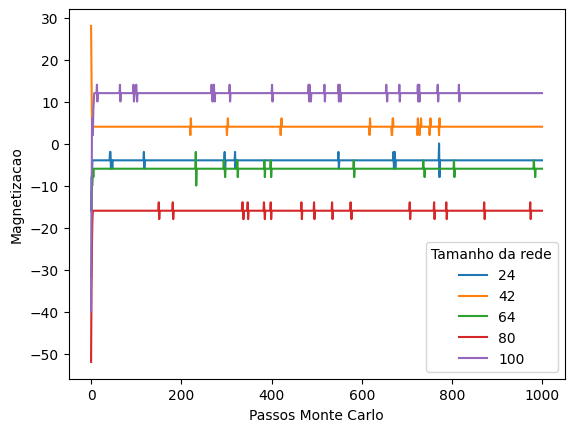

In [74]:
plt.plot(range(mc), magnet_df)
plt.legend(title="Tamanho da rede", labels = size)
plt.xlabel("Passos Monte Carlo")
plt.ylabel("Magnetizacao")

Text(0, 0.5, 'Magnetizacao')

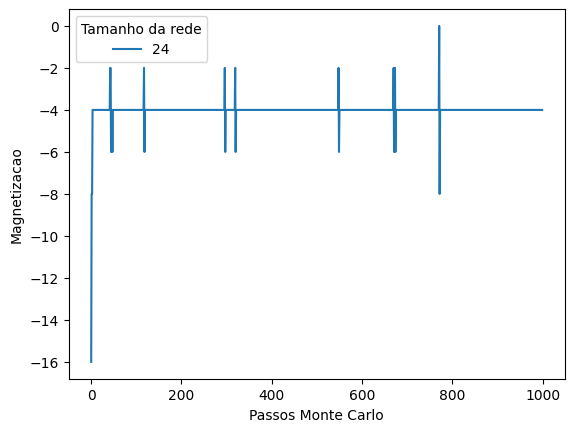

In [75]:
plt.plot(range(mc), magnet_df[24])
plt.legend(title="Tamanho da rede", labels = size)
plt.xlabel("Passos Monte Carlo")
plt.ylabel("Magnetizacao")

In [65]:
#Simulating 5 different values of temperature with size setted to 24
temperature = [0.4, 1.2, 1.8, 2.2, 2.6, 3]
size = 24

#Number of monte carlo simulations
mc = 1000

np.random.seed(42)

#results dataframe
energy_df = pd.DataFrame(columns=temperature)
magnet_df = pd.DataFrame(columns=temperature)

for i in range(len(temperature)):
    local_temperature = temperature[i]
    
    #Create net and neighbors list
    net = create_net(size)
    viz = vizinhos(size)

    #Calculate energy and magnet
    energy = energia(net, viz)
    mmagnet = calc_magnet(net)

    #results arrays
    energy_array = np.zeros(mc)
    magnet_array = np.zeros(mc)

    #1000 Monte Carlo steps
    for j in range(mc):
        energy_array[j], magnet_array[j] = monteCarlo(net, local_temperature, viz, energy, mmagnet)

    energy_df[local_temperature] = energy_array
    magnet_df[local_temperature] = magnet_array    

Text(0, 0.5, 'Energia')

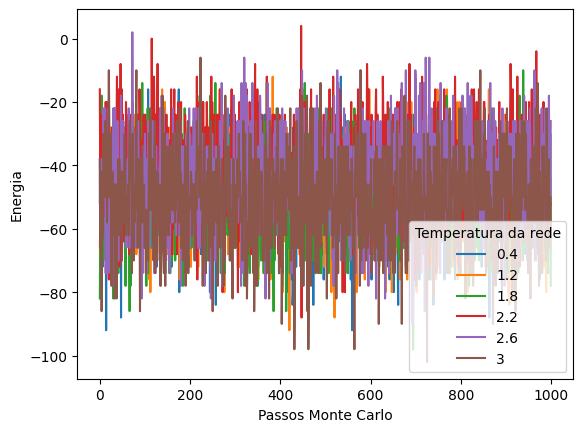

In [66]:
plt.plot(range(mc), energy_df)
plt.legend(title="Temperatura da rede", labels = temperature)
plt.xlabel("Passos Monte Carlo")
plt.ylabel("Energia")


Text(0, 0.5, 'Magnetizacao')

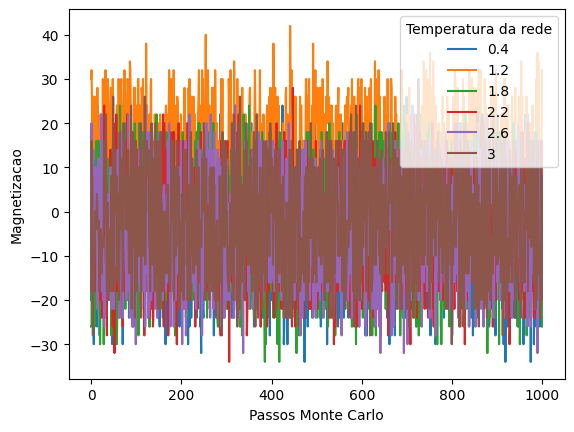

In [67]:
plt.plot(range(mc), magnet_df)
plt.legend(title="Temperatura da rede", labels = temperature)
plt.xlabel("Passos Monte Carlo")
plt.ylabel("Magnetizacao")